# **Cybersecurity Threats Data Analysis (2015–2024)**
## **Danil Saitov**
Hey everyone, my name is Danil and this data visualization project will focus on analyzing global cybersecurity threats between 2015-2024. This includes financial losses, affected countries, attack types, vulnerabilities, and resolution times using Python and visual storytelling.

## **What's the problem?**
Cybersecurity threats are a growing issue, impacting industries, companies, and individuals worldwide. These attacks can lead to financial losses, operational disruptions, and the exposure of sensitive data. I believe that by analyzing cybersecurity incident data, we can uncover patterns and trends that help organizations strengthen their defenses and respond more effectively to future threats. This is why I chose to do this dataset in particular and we will explore the following questions as we

**Guiding Questions:**
- Have financial losses from cyber threats increased over the years?
- Which countries are most affected by financial losses?
- Which attack types and vulnerabilities cause the most damage?
- Which attack types take the longest to resolve?

## **What data are we using?**
This is an open dataset I have sourced on [Kaggle](https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024?resource=download). It consists of exactly 3,000 cybersecurity incidents recorded across multiple countries from 2015 leading up to 2024. This dataset does not contain every incident that happened within that period, but it gives us a good enough of a sample size to make conclusions about what was prevelant during that time. To further understand the data, I will expand on specific information it provides below.

**This dataset provides the following information:**
- `Country`: Where the incident took place.
- `Year`: When the attack occurred.
- `Attack Type`: Method used (Phishing, Ransomware, etc.).
- `Target Industry`: Industry sector affected.
- `Financial Loss (in Million $)`: Estimated monetary impact.
- `Number of Affected Users`: People or accounts compromised.
- `Attack Source`: Actor behind the attack (nation-state, insider, hacker group).
- `Security Vulnerability Type`: Root cause exploited.
- `Defense Mechanism Used`: Response strategy employed.
- `Incident Resolution Time (in Hours)`: Time taken to mitigate the incident.

The code below imports necessary librarues and will allow us to perform analysis and visualizations later on.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Code below loads the data
df = pd.read_csv('Global_Cybersecurity_Threats_2015-2024 (1).csv')
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


## 3. **Pre-processing the Data**
This data set is already really clean, but we will still make sure that there are no missing values which could offset the results of our analysis



In [ ]:
# This code checks for missing values
df.isna().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

## **How do the overall financial losses look like over time?**

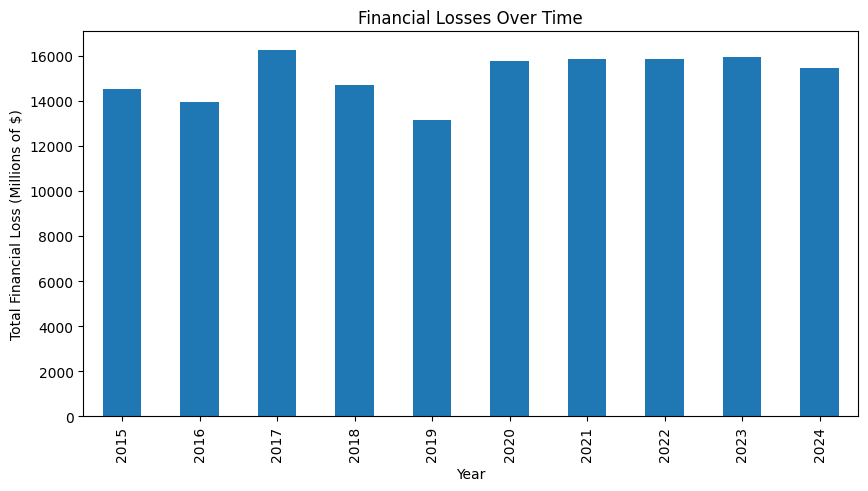

In [4]:
plt.figure(figsize=(10,5))
df.groupby('Year')['Financial Loss (in Million $)'].sum().plot(kind='bar')
plt.title('Financial Losses Over Time')
plt.ylabel('Total Financial Loss (Millions of $)')
plt.show()

Based on the chart above, we can see that financial losses have generally been growing as time went on, highlighting the importance of having proper cybersecurity controls established. It was pretty interesting to me that the financial losses seemed to drop during 2019 specifically. This does not necessarily mean that there were less cyber threats during that year, since the decrease could be attributed to underreporting of financial losses, or even bias within the dataset.

## **Which countries were most affected?**

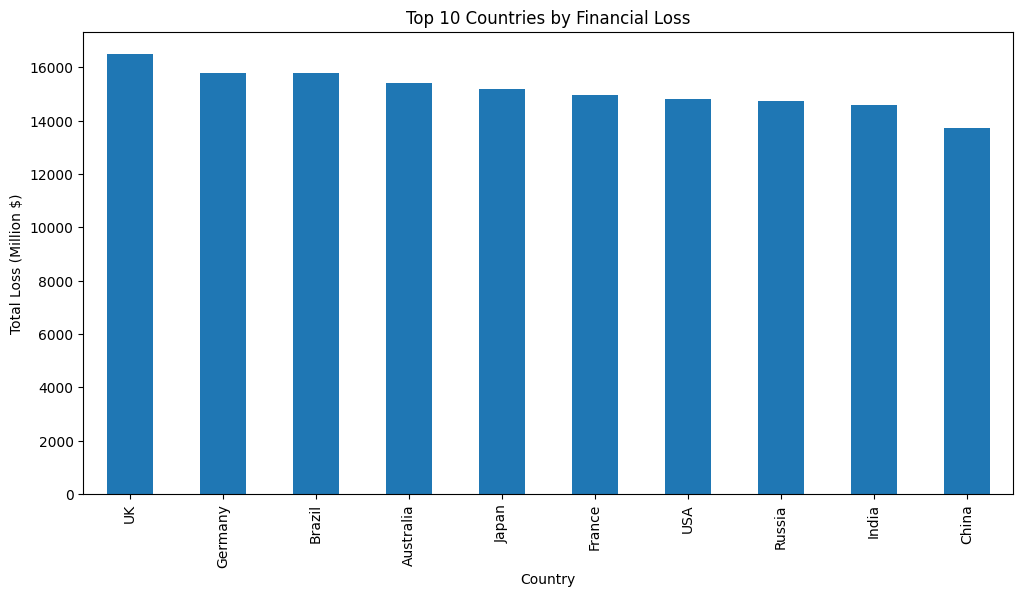

In [11]:
plt.figure(figsize=(12,6))
df.groupby('Country')['Financial Loss (in Million $)'].sum().nlargest(10).plot(kind='bar')
plt.title('Top 10 Countries by Financial Loss')
plt.ylabel('Total Loss (Million $)')
plt.show()

The dataset shows that the UK, Germany, and Brazil report the highest financial losses, while the USA is interestingly lower on the list than I thought. This could reflect differences in industry exposure, attack prevalence, and reporting practices rather than a genuine reduction in US cyber risk. For example, European countries are required under GDPR to disclose more details about financial damages, while Brazil faces high cybercrime targeting its banking sector. Meanwhile, the US may appear lower because of a mature cyber insurance industry and differences in how losses are disclosed or absorbed, rather than fewer or less costly attacks.

## Step 4: Attack Types and Their Impact

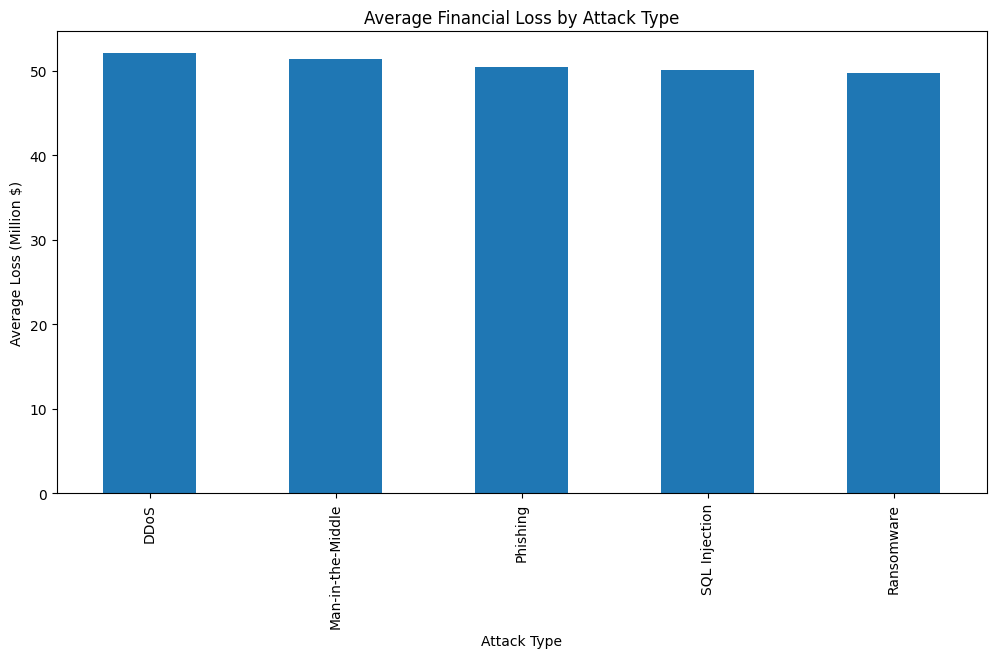

In [13]:
plt.figure(figsize=(12,6))
df.groupby('Attack Type')['Financial Loss (in Million $)'].mean().nlargest(5).plot(kind='bar')
plt.title('Average Financial Loss by Attack Type')
plt.ylabel('Average Loss (Million $)')
plt.show()

The analysis shows that DDoS attacks caused the highest average financial losses. This makes sense because DDoS directly disrupts availability and operations, where downtime translates to millions in losses.

Some might wonder how Man-in-the-Middle (MitM) attacks ranked so high despite being less common. The reason is that these attacks often target sensitive communications from highly ranked executives or decision-makers, allowing attackers to intercept financial transfers or authorize fraudulent transactions. This means that even a single successful interception can involve millions of dollars, so the average financial impact of MitM incidents is disproportionately high.

Phishing attacks follow closely behind. Phishing is one of the most common and successful social engineering techniques. By tricking employees or even executives into revealing credentials or approving fraudulent payments, phishing attacks can open the door to unauthorized account access, large-scale fraud, and even secondary attacks such as ransomware. The widespread nature of phishing, combined with its ability to compromise high-value targets, helps explain its significant financial toll.

## **Vulnerabilities and Resolution Time**

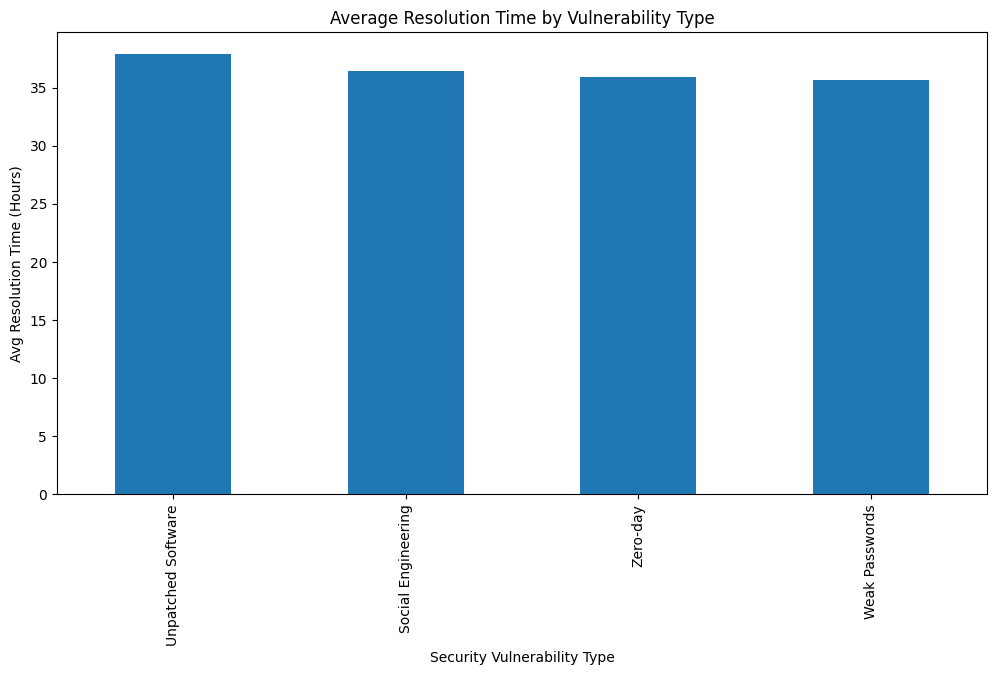

In [15]:
plt.figure(figsize=(12,6))
df.groupby('Security Vulnerability Type')['Incident Resolution Time (in Hours)'].mean().nlargest(5).plot(kind='bar')
plt.title('Average Resolution Time by Vulnerability Type')
plt.ylabel('Avg Resolution Time (Hours)')
plt.show()


The chart shows that unpatched software, social engineering, and zero-day exploits take the longest to resolve. This makes sense: unpatched software often lingers because updates disrupt operations, social engineering relies on changing human behavior (which can’t be “patched” overnight), and zero-days have no fix until vendors discover and release one.

## **Impact**
The findings highlight a few important lessons for organizations. First, financial damages are increasing, making proactive investment in cybersecurity critical rather than optional. Countries with stricter disclosure requirements or industries more heavily targeted (like finance) may appear worse off, but no region is immune—cyber threats are global.

Second, the outsized impact of DDoS, Man-in-the-Middle, and phishing shows that attackers focus on both availability and trust. Even one successful interception or fraudulent approval can result in multi-million-dollar losses. This underscores the importance of securing executive communications and implementing layered defenses.

Lastly, the long resolution times for unpatched software, social engineering, and zero-days reveal a gap between detection and defense. While technical fixes like patching and threat intelligence help, human factors (such as training employees against phishing and social engineering) remain just as critical.

Overall, these results reinforce that cybersecurity is not only a technical challenge but also an organizational and behavioral one. Strengthening both technical defenses and human awareness will be key to reducing future risks.

## **References**
**Atharvasoundankar. Global Cybersecurity Threats (2015–2024), Kaggle, 2024,**

https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024